In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
# 시각화 결과가 선명하게 표시되도록
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv("word2vec_wrangling.csv")
df.shape

(61, 2)

In [4]:
df.head()

,exercise_name,Content_txt
0,PT,"💯 What I try to educate my clients around, doe..."
1,검도,#20200115\n저녁 초대!\n와인잔 속에 비치는\n모든 것들이 화려한\n도심속...
2,기구필라테스,#오늘의동작\n캐딜락 동작의 완성 '행잉'\n⠀\n중력을 이용해 척추를 늘려주고\n...
3,다빈치바디보드,#mbn생생정보마당 \n#고투\n#고투GX\n#다빈치바디보드\n#생방송 #GOTOL...
4,드럼스틱,#드럼스틱 #고무팁 #테크라스틱 #전자드럼용스틱\n\n1. 전자드럼타격시 덜 시끄럽...


In [5]:
import soynlp
import gensim

In [6]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [7]:
def open_file(exercise_name):
    file_name = "#" + exercise_name + "_sum.txt"
    file_1 = "/Users/noopy/FitCuration/" + file_name
    text = open(file_1, 'r', -1, "UTF-8", errors="ignore").read()
    return text

In [8]:
sample_content = open_file("자이로토닉")

In [9]:
sample_content = preprocessing(sample_content)
sample_content

'   자이로토닉  gyrotonic 비교할 수 없는 레슨 퀄리티     월 프롬과 함께하세요   위례신도시 No      월 이벤트  신규 개인레슨   회   만원 선착순   분   신규 그룹레슨 최대    할인 개월수 별로 할인율 상이    인 이상 단체등록 시 신규클래스 오픈      인 소수 그룹레슨 미국 BBU 장비        개인레슨 미국 Gratz  BBU  Gyrotonic 장비     클래식필라테스  자이로토닉    프롬필라테스 위례동로     우성메디피아  층                  안녕하세요  에코필라테스 플러스입니다     설 연휴 전까지 열심히 운동하러 오시는 우리 멋찐 회원님들을 맞이하려 저는 출근하자마자 부랴부랴 청소를 끝마쳤답니다      어서 센터를 뜨겁게 달구어 주세요     오늘도 평화로운 에코필라테스 플러스와 함께        자세한 문의 및 상담                 카카오 오픈채팅   에코필라테스플러스   blog naver com ecopilatesplus   첨먹어보는 춰컬릿    사만다 에듀케이터  samantha jrobinsonhk 의 달달한간식   맛있다   ㅎㅎ자꾸먹게되는군요      아치앤컬  필라테스  폴스타필라테스  자이로토닉  자이로토닉   자이로키네시스  자이로키네시스   청담필라테스  청담자이로토닉  부산필라테스  부산자이로토닉  archncurl  pilates  polestarpilates  gyrotonic  gyrokinesis 효지원장님  misa limepilates 의 선물    교육듣느라 안그래도 정신없을텐데 요렇게 또 챙겨주니 넘 고마워요 이쁘게 잘쓸게용         아치앤컬  필라테스  폴스타필라테스  자이로토닉  자이로토닉강사  자이로키네시스  자이로키네시스   청담필라테스  부산필라테스  청담자이로토닉  부산자이로토닉  archncurl  pilates  polestarpilates  gyrotonic  gyrokinesis  지유필라테스 자이로토닉 G YOU

In [11]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

/Users/noopy/opt/anaconda3/lib/python3.7/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [12]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content

['자이로토닉',
 'gyrotonic',
 '비교할',
 '수',
 '없는',
 '레슨',
 '퀄리티',
 '월',
 '프롬과',
 '함께하세요',
 '위례신도시',
 'No',
 '월',
 '이벤트',
 '신규',
 '개인레슨',
 '회',
 '만원',
 '선착순',
 '분',
 '신규',
 '그룹레슨',
 '최대',
 '할인',
 '개월수',
 '별로',
 '할인율',
 '상이',
 '인',
 '이상',
 '단체등록',
 '시',
 '신규클래스',
 '오픈',
 '인',
 '소수',
 '그룹레슨',
 '미국',
 'BBU',
 '장비',
 '개인레슨',
 '미국',
 'Gratz',
 'BBU',
 'Gyrotonic',
 '장비',
 '클래식필라테스',
 '자이로토닉',
 '프롬필라테스',
 '위례동로',
 '우성메디피아',
 '층',
 '안녕하세요',
 '에코필라테스',
 '플러스입니다',
 '설',
 '연휴',
 '전까지',
 '열심히',
 '운동하러',
 '오시는',
 '우리',
 '멋찐',
 '회원님들을',
 '맞이하려',
 '저는',
 '출근하자마자',
 '부랴부랴',
 '청소를',
 '끝마쳤답니다',
 '어서',
 '센터를',
 '뜨겁게',
 '달구어',
 '주세요',
 '오늘도',
 '평화로운',
 '에코필라테스',
 '플러스와',
 '함께',
 '자세한',
 '문의',
 '및',
 '상담',
 '카카오',
 '오픈채팅',
 '에코필라테스플러스',
 'blog',
 'naver',
 'com',
 'ecopilatesplus',
 '첨먹어보는',
 '춰컬릿',
 '사만다',
 '에듀케이터',
 'samantha',
 'jrobins',
 'onhk',
 '의',
 '달달한간식',
 '맛있다',
 'ㅎㅎ',
 '자꾸먹게되는군요',
 '아치앤컬',
 '필라테스',
 '폴스타필라테스',
 '자이로토닉',
 '자이로토닉',
 '자이로키네시스',
 '자이로키네시스',
 '청담필라테스',
 '청담자이로토닉',
 '부산필라테스',
 '부산자이로토닉',


In [13]:
print(len(tokened_content))

43663


In [17]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [25]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = df['Content_txt'].apply(preprocessing)

CPU times: user 781 ms, sys: 6.42 ms, total: 787 ms
Wall time: 787 ms


In [26]:
# 초기화 및 모델 학습
from gensim.models import word2vec

%time tokens = sentences.apply(tokenizer.tokenize)

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2020-02-02 23:39:28,013 : INFO : collecting all words and their counts
2020-02-02 23:39:28,014 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


CPU times: user 14.1 s, sys: 57.4 ms, total: 14.2 s
Wall time: 14.2 s


2020-02-02 23:39:28,559 : INFO : collected 324341 word types from a corpus of 2300597 raw words and 61 sentences
2020-02-02 23:39:28,559 : INFO : Loading a fresh vocabulary
2020-02-02 23:39:29,654 : INFO : effective_min_count=1 retains 324341 unique words (100% of original 324341, drops 0)
2020-02-02 23:39:29,655 : INFO : effective_min_count=1 leaves 2300597 word corpus (100% of original 2300597, drops 0)
2020-02-02 23:39:30,420 : INFO : deleting the raw counts dictionary of 324341 items
2020-02-02 23:39:30,425 : INFO : sample=0.001 downsamples 9 most-common words
2020-02-02 23:39:30,425 : INFO : downsampling leaves estimated 2287695 word corpus (99.4% of prior 2300597)
2020-02-02 23:39:31,108 : INFO : estimated required memory for 324341 words and 100 dimensions: 421643300 bytes
2020-02-02 23:39:31,109 : INFO : resetting layer weights
2020-02-02 23:40:19,449 : INFO : training model with 3 workers on 324341 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2

In [28]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]


CPU times: user 13.7 s, sys: 63.1 ms, total: 13.7 s
Wall time: 13.7 s


0    [What, I, try, to, educate, my, clients, aroun...
1    [저녁, 초대, 와인잔, 속에, 비치는, 모든, 것들이, 화려한, 도심속의, 서울,...
2    [오늘의동작, 캐딜락, 동작의, 완성, 행잉, 중력을, 이용해, 척추를, 늘려주고,...
Name: Content_txt, dtype: object

In [29]:
# 모델 이름을 지정하고 저장한다.
model_name = 'my_first_model'
model.save(model_name)

2020-02-02 23:41:38,355 : INFO : saving Word2Vec object under my_first_model, separately None
2020-02-02 23:41:38,356 : INFO : storing np array 'vectors' to my_first_model.wv.vectors.npy
2020-02-02 23:41:38,662 : INFO : not storing attribute vectors_norm
2020-02-02 23:41:38,662 : INFO : storing np array 'syn1neg' to my_first_model.trainables.syn1neg.npy
2020-02-02 23:41:38,953 : INFO : not storing attribute cum_table
2020-02-02 23:41:39,475 : INFO : saved my_first_model


In [30]:
# 단어 사전 수
len(model.wv.vocab)


324341

In [31]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['운동',
 '다이어트',
 '요가',
 '필라테스',
 '월',
 '시',
 '일',
 '운동하는여자',
 '수',
 '일상',
 'a',
 '더',
 't',
 '분',
 '함께',
 '년',
 '문의',
 'pt',
 '있는',
 '운동하는남자',
 'PT',
 '헬스',
 '살사',
 '플라잉요가',
 '층',
 '너무',
 '바차타',
 'yoga',
 '있습니다',
 '시간']

In [32]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'운동': <gensim.models.keyedvectors.Vocab at 0x7f87d6991110>,
 '다이어트': <gensim.models.keyedvectors.Vocab at 0x7f87d69911d0>,
 '요가': <gensim.models.keyedvectors.Vocab at 0x7f87300e2490>,
 '필라테스': <gensim.models.keyedvectors.Vocab at 0x7f873008df90>,
 '월': <gensim.models.keyedvectors.Vocab at 0x7f87300f0b90>,
 '시': <gensim.models.keyedvectors.Vocab at 0x7f8730171f50>,
 '일': <gensim.models.keyedvectors.Vocab at 0x7f87301781d0>,
 '운동하는여자': <gensim.models.keyedvectors.Vocab at 0x7f87d6991190>,
 '수': <gensim.models.keyedvectors.Vocab at 0x7f87300a8910>,
 '일상': <gensim.models.keyedvectors.Vocab at 0x7f873008f0d0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f87c2187950>,
 '더': <gensim.models.keyedvectors.Vocab at 0x7f87e31e3790>,
 't': <gensim.models.keyedvectors.Vocab at 0x7f87c2645490>,
 '분': <gensim.models.keyedvectors.Vocab at 0x7f8781992ad0>,
 '함께': <gensim.models.keyedvectors.Vocab at 0x7f87300f4d90>,
 '년': <gensim.models.keyedvectors.Vocab at 0x7f876c95c410>,
 '문의': <gensim.models.key

In [33]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'encourage'

In [34]:
model.wv.most_similar('자이로토닉')

2020-02-02 23:42:35,145 : INFO : precomputing L2-norms of word weight vectors


[('자이로키네시스', 0.9982904195785522),
 ('발레핏', 0.9974616765975952),
 ('가희', 0.9970693588256836),
 ('ttc', 0.996626079082489),
 ('다빈치바디보드', 0.9961905479431152),
 ('클래식필라테스', 0.9957948923110962),
 ('폼롤러', 0.995484471321106),
 ('여성전용', 0.9954193830490112),
 ('설명절', 0.9949073791503906),
 ('부산요가', 0.9943119883537292)]

In [35]:
model.wv.most_similar('복근')

[('복근운동', 0.9992300868034363),
 ('모델', 0.998993992805481),
 ('런', 0.9987736940383911),
 ('합기도', 0.9985851049423218),
 ('폴댄스', 0.9985740184783936),
 ('광주', 0.9984042048454285),
 ('상인동', 0.9982923269271851),
 ('코어운동', 0.9982035160064697),
 ('태권도', 0.9981626868247986),
 ('갑니다', 0.9981544017791748)]

In [36]:
model.wv.most_similar('척추')

[('여전히', 0.9987314343452454),
 ('우한', 0.9985310435295105),
 ('어느새', 0.9985133409500122),
 ('엄청', 0.9984723329544067),
 ('운동하며', 0.9984238743782043),
 ('울', 0.9984229207038879),
 ('함께해서', 0.9984023571014404),
 ('하다가', 0.9983784556388855),
 ('푹', 0.9983559250831604),
 ('평생', 0.9983251094818115)]

In [44]:
model.wv.most_similar(positive=['척추','건강'], negative=['우한'])

[('타바타운동', 0.9961912631988525),
 ('유연성', 0.9956024289131165),
 ('교정', 0.9955008029937744),
 ('근육학', 0.9954005479812622),
 ('벌크업', 0.9948692321777344),
 ('홈트', 0.9947450757026672),
 ('코어강화', 0.9945970773696899),
 ('근육기능운동', 0.9940768480300903),
 ('헬스장', 0.9939762949943542),
 ('운동', 0.9938791394233704)]

In [45]:
model.wv.most_similar(positive=['척추','건강'])

[('대한폴댄스연맹', 0.9983609318733215),
 ('여름', 0.9979842901229858),
 ('MMA', 0.99770587682724),
 ('점핑', 0.9976186156272888),
 ('가즈아', 0.9975834488868713),
 ('운동영상', 0.9973958730697632),
 ('우아하게', 0.9971697926521301),
 ('필라테스하는여자', 0.9971282482147217),
 ('수영장', 0.9970409870147705),
 ('샐러드', 0.9968857169151306)]

In [51]:
model.wv.similarity('척추', '키네시스')

0.99158806

In [48]:
model.wv.similarity('척추', '자이로토닉')

0.9044117

In [49]:
model.wv.similarity('척추', '암벽등반')

0.89136827

In [52]:
model.wv.similarity('척추', '암벽등반')

0.89136827

In [50]:
model.wv.similarity('척추', '발레')

0.9083888

In [53]:
model.wv.similarity('척추', '필라테스')

0.8247616

In [37]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'my_first_model'
model = g.Doc2Vec.load(model_name)

2020-02-02 23:45:14,789 : INFO : loading Doc2Vec object from my_first_model
2020-02-02 23:45:15,906 : INFO : loading wv recursively from my_first_model.wv.* with mmap=None
2020-02-02 23:45:15,906 : INFO : loading vectors from my_first_model.wv.vectors.npy with mmap=None
2020-02-02 23:45:15,934 : INFO : setting ignored attribute vectors_norm to None
2020-02-02 23:45:15,935 : INFO : loading vocabulary recursively from my_first_model.vocabulary.* with mmap=None
2020-02-02 23:45:15,935 : INFO : loading trainables recursively from my_first_model.trainables.* with mmap=None
2020-02-02 23:45:15,936 : INFO : loading syn1neg from my_first_model.trainables.syn1neg.npy with mmap=None
2020-02-02 23:45:15,999 : INFO : setting ignored attribute cum_table to None
2020-02-02 23:45:16,000 : INFO : loaded my_first_model


In [38]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

/Users/noopy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 324341
[ 0.16009222  0.10082309 -0.12740155 -0.01133832 -0.01266803  0.05140787
 -0.0723937  -0.08212123  0.01179277  0.0796162 ]


In [39]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [40]:
df.head(20)

,x,y
What,-3.806759,2.215270
I,-8.768324,-8.060360
try,-5.098155,2.501968
to,-9.648032,-8.823252
educate,6.337830,11.510562
my,-6.986479,-4.717114
clients,-3.107552,6.780982
around,-5.022229,0.446222
does,-2.386213,6.514915
n,-6.755256,-3.846032


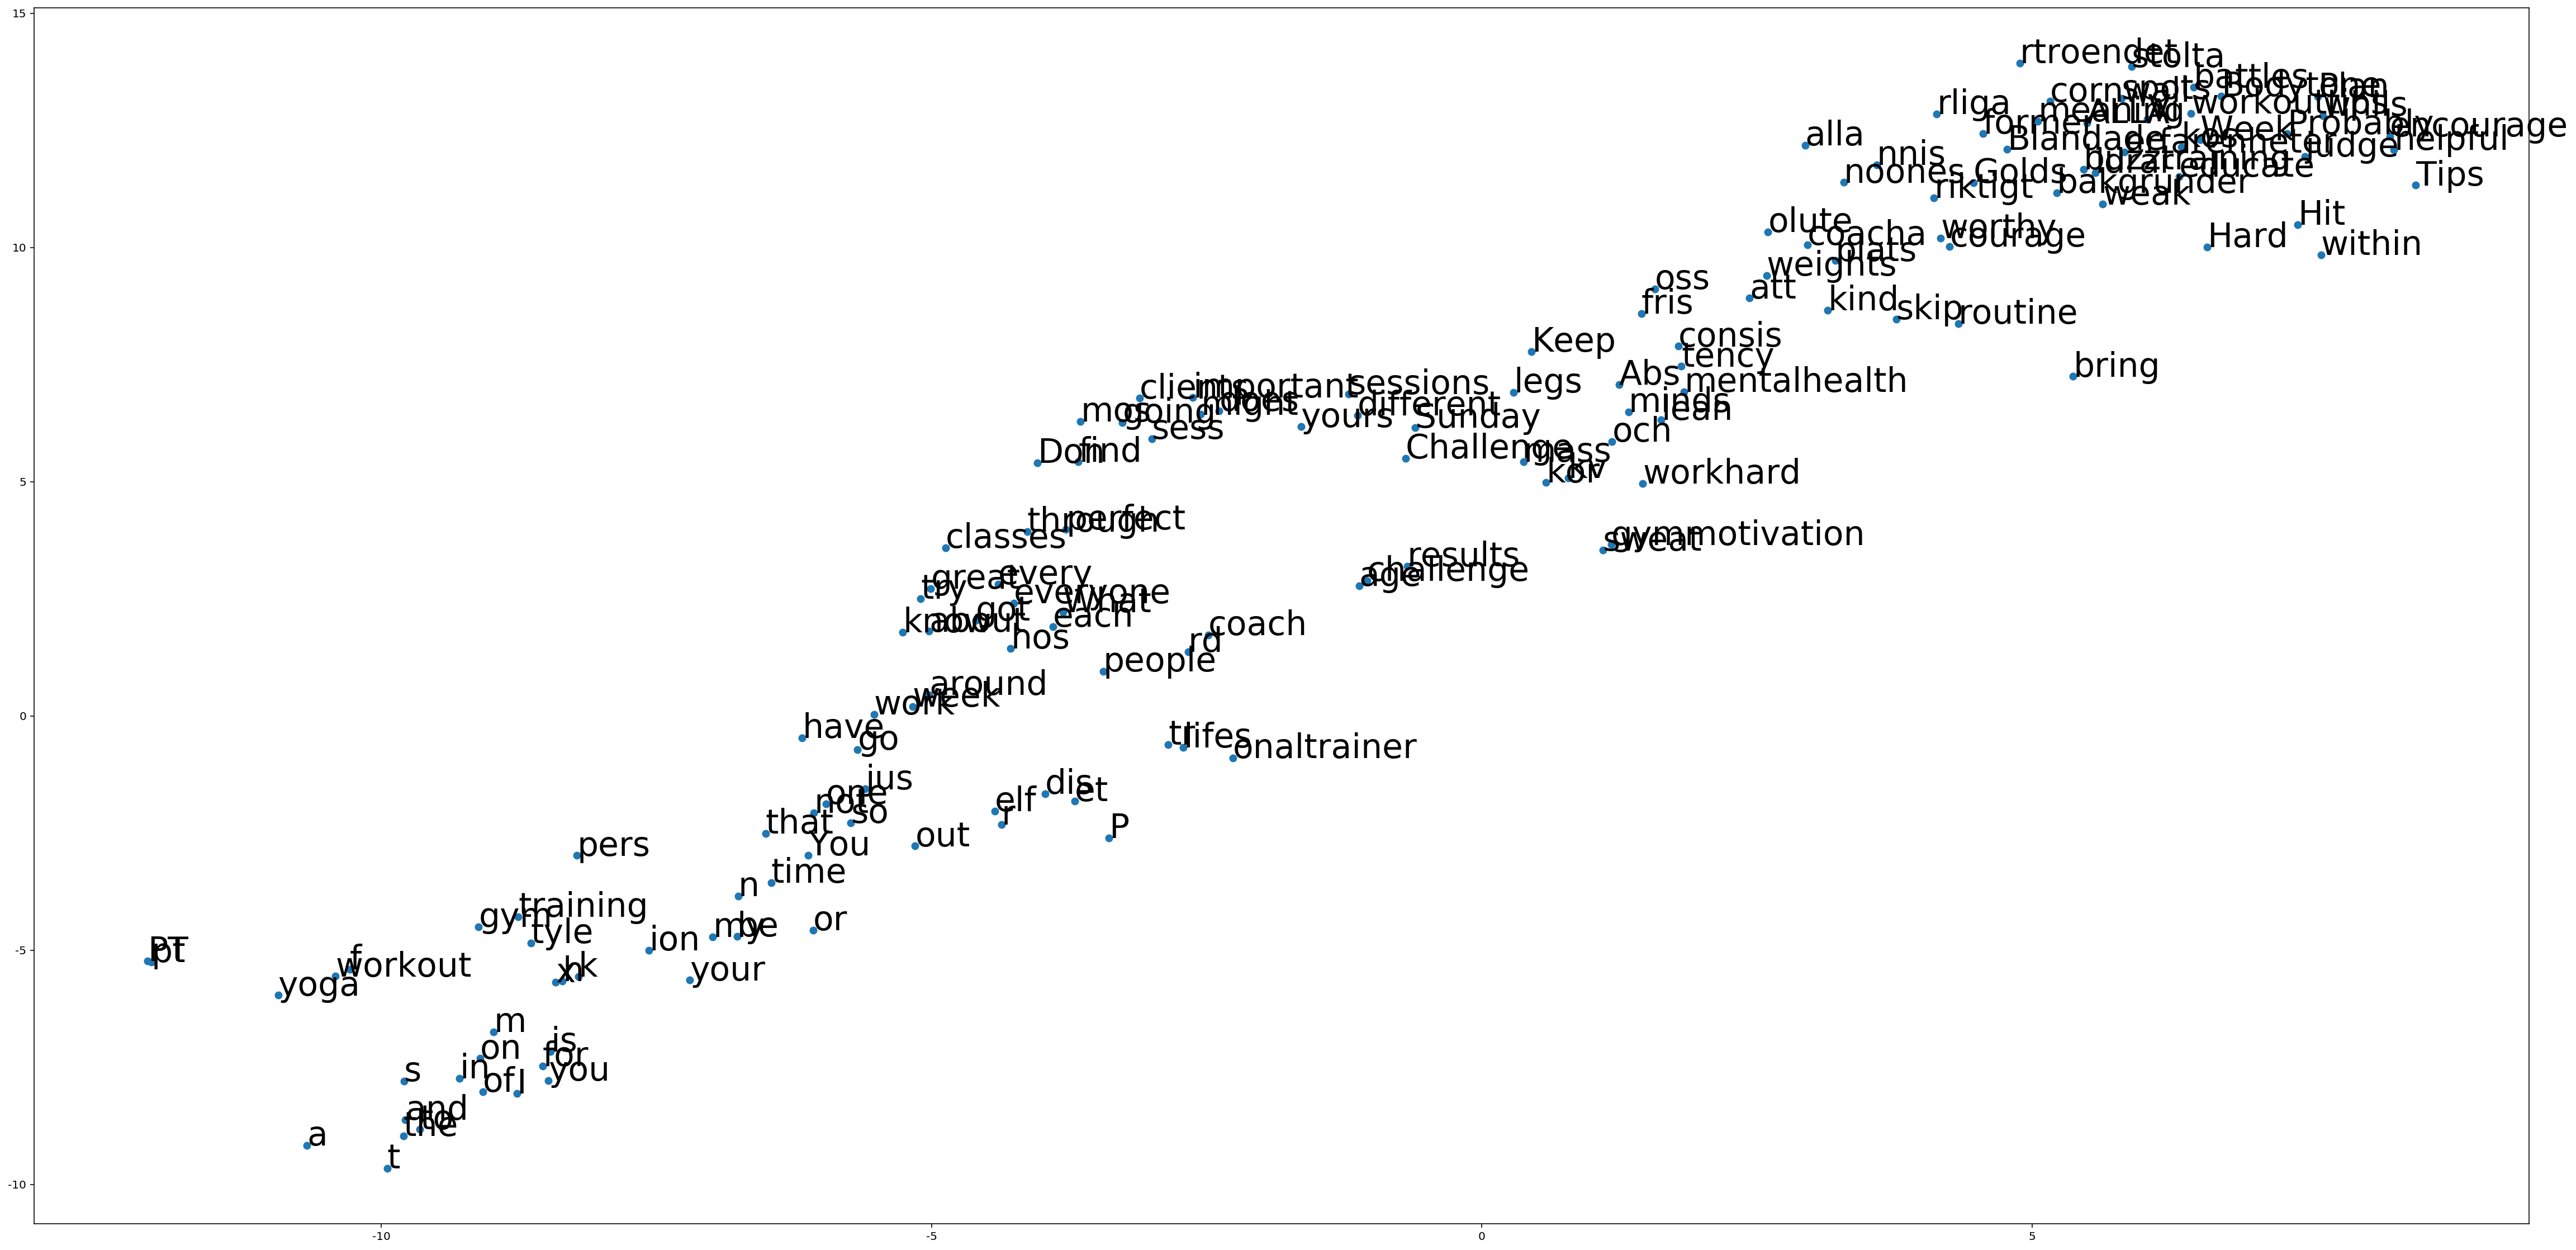

In [41]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()